In [10]:
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # ERROR 메시지만 출력하도록 설정
# GPU 설정 로그 억제
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
"""

In [11]:
# 설정 변수
epochs = 20
batch_size = 32
validation_split = 0.2

In [12]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# 파일 경로 설정
train_file_path = 'data/mnt/train.csv'
export_path = 'data/'
train_data = pd.read_csv(train_file_path)

# 텍스트 정제 함수
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # 다중 공백 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    return text.strip()

train_data['cleaned_conversation'] = train_data['conversation'].apply(clean_text)
train_data['text_length'] = train_data['cleaned_conversation'].apply(len)

# 토크나이저 설정
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['cleaned_conversation'])

# 시퀀스 변환 및 패딩
sequences = tokenizer.texts_to_sequences(train_data['cleaned_conversation'])
max_length = 300
X_data = pad_sequences(sequences, maxlen=max_length, padding='post')

# 레이블 인코딩
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(train_data['class'])

# 결과 확인
print('토크나이저 단어 개수:', len(tokenizer.word_index))
print('X_data 크기:', X_data.shape)
print('y_data 크기:', y_data.shape)

토크나이저 단어 개수: 52568
X_data 크기: (3950, 300)
y_data 크기: (3950,)


In [13]:
# 전처리된 데이터 저장
# np.save(export_path + 'X_data.npy', X_data)
# np.save(export_path + 'y_data.npy', y_data)

# 데이터 로드
# padded_sequences = np.load('data/X_data.npy')
#labels = np.load('data/y_data.npy')
padded_sequences = X_data
labels = y_data

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

# 입력 정의
input_layer = Input(shape=(max_length,), name='input')

# 임베딩 층
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

# LSTM 층
lstm_layer = LSTM(64)(embedding_layer)

# 출력층 정의
num_classes = 4
output_layer = Dense(num_classes, activation='softmax', name='output')(lstm_layer)

# 모델 생성
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 128)          6728832   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 output (Dense)              (None, 4)                 260       
                                                                 
Total params: 6,778,500
Trainable params: 6,778,500
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 모델 학습
history = model.fit(
    padded_sequences, labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split
)

Epoch 1/20
99/99 [==============================] - 4s 29ms/step - loss: 1.3853 - accuracy: 0.2753 - val_loss: 1.3887 - val_accuracy: 0.2494
Epoch 2/20
99/99 [==============================] - 2s 25ms/step - loss: 1.3842 - accuracy: 0.2839 - val_loss: 1.3911 - val_accuracy: 0.2494
Epoch 3/20
99/99 [==============================] - 2s 24ms/step - loss: 1.3833 - accuracy: 0.2839 - val_loss: 1.3892 - val_accuracy: 0.2494
Epoch 4/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3835 - accuracy: 0.2839 - val_loss: 1.3924 - val_accuracy: 0.2494
Epoch 5/20
99/99 [==============================] - 2s 22ms/step - loss: 1.3828 - accuracy: 0.2839 - val_loss: 1.3941 - val_accuracy: 0.2494
Epoch 6/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3831 - accuracy: 0.2839 - val_loss: 1.3903 - val_accuracy: 0.2494
Epoch 7/20
99/99 [==============================] - 2s 22ms/step - loss: 1.3829 - accuracy: 0.2839 - val_loss: 1.3905 - val_accuracy: 0.2494
Epoch 8/20
99

# 1. CNN 구조를 엮은 모델

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense

input_layer = Input(shape=(max_length,), name='input')

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

conv_layer = Conv1D(filters=128, kernel_size=5, activation='relu')(embedding_layer)
polling_layer = GlobalMaxPooling1D()(conv_layer)

output_layer = Dense(num_classes, activation='softmax', name='output')(polling_layer)

model_conv = Model(inputs=input_layer, outputs=output_layer)
model_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_conv.summary()

In [17]:
con_history = model.fit(
    padded_sequences,
    labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split
)

Epoch 1/20
99/99 [==============================] - 2s 22ms/step - loss: 1.3827 - accuracy: 0.2839 - val_loss: 1.3932 - val_accuracy: 0.2494
Epoch 2/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3827 - accuracy: 0.2839 - val_loss: 1.3897 - val_accuracy: 0.2494
Epoch 3/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3826 - accuracy: 0.2839 - val_loss: 1.3905 - val_accuracy: 0.2494
Epoch 4/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3825 - accuracy: 0.2839 - val_loss: 1.3910 - val_accuracy: 0.2494
Epoch 5/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3825 - accuracy: 0.2839 - val_loss: 1.3908 - val_accuracy: 0.2494
Epoch 6/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3826 - accuracy: 0.2839 - val_loss: 1.3903 - val_accuracy: 0.2494
Epoch 7/20
99/99 [==============================] - 2s 23ms/step - loss: 1.3825 - accuracy: 0.2839 - val_loss: 1.3910 - val_accuracy: 0.2494
Epoch 8/20
99

# Bidirectional LSTM

In [28]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense

# 입력 정의
input_layer = Input(shape=(max_length,), name='input')

# 임베딩 층
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)

# 양방향 LSTM 층
bi_lstm_layer = Bidirectional(LSTM(64))(embedding_layer)

# 출력층 정의
output_layer = Dense(num_classes, activation='softmax', name='output')(bi_lstm_layer)

# 모델 생성
model_bi = Model(inputs=input_layer, outputs=output_layer)

# 모델 컴파일
model_bi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_bi.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 128)          6728832   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 output (Dense)              (None, 4)                 516       
                                                                 
Total params: 6,828,164
Trainable params: 6,828,164
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_bi_history = model_bi.fit(
    padded_sequences,
    labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split
)

Epoch 1/20
99/99 [==============================] - 6s 43ms/step - loss: 1.1562 - accuracy: 0.5028 - val_loss: 0.8689 - val_accuracy: 0.6823
Epoch 2/20
99/99 [==============================] - 4s 38ms/step - loss: 0.4829 - accuracy: 0.8563 - val_loss: 0.5904 - val_accuracy: 0.7861
Epoch 3/20
99/99 [==============================] - 4s 38ms/step - loss: 0.1326 - accuracy: 0.9687 - val_loss: 0.5455 - val_accuracy: 0.8114
Epoch 4/20
99/99 [==============================] - 4s 39ms/step - loss: 0.0316 - accuracy: 0.9959 - val_loss: 0.5861 - val_accuracy: 0.8063
Epoch 5/20
99/99 [==============================] - 4s 39ms/step - loss: 0.0215 - accuracy: 0.9965 - val_loss: 0.6728 - val_accuracy: 0.7671
Epoch 6/20
99/99 [==============================] - 4s 39ms/step - loss: 0.0278 - accuracy: 0.9943 - val_loss: 0.6061 - val_accuracy: 0.8190
Epoch 7/20
99/99 [==============================] - 4s 40ms/step - loss: 0.0188 - accuracy: 0.9949 - val_loss: 0.7059 - val_accuracy: 0.7722
Epoch 8/20
99

# BERT 모델

In [44]:
"""
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D

bert_model_name = 'distilbert-base-uncased'

# BERT 모델 로드
bert_model = TFBertModel.from_pretrained(bert_model_name)

# BERT 토크나이저
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

# 입력 정의
input_ids = Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

# BERT 모델 레이어
bert_output = bert_model([input_ids, attention_mask])[0]

pooling_layer = GlobalAveragePooling1D()(bert_output)

# 출력층 정의
output_layer = Dense(num_classes, activation='softmax', name='output')(pooling_layer)

# 모델 생성
model_bert = Model(inputs=[input_ids, attention_mask], outputs=output_layer)

# 모델 컴파일
model_bert.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_bert.summary()
"""

c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ZAMTOL\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 300)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 300)]        0           []                               
                                                                                                  
 tf_bert_model_4 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 300,                                         

In [45]:
"""
# BERT 입력 데이터 생성
def encode_textx(texts, max_length):
    inputs = tokenizer(texts, max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')
    return inputs['input_ids'], inputs['attention_mask']

texts = train_data['cleaned_conversation'].tolist()
input_ids, attention_mask = encode_textx(texts, max_length)

# 모델 학습
history_bert = model_bert.fit(
    [input_ids, attention_mask],
    labels,
    epochs=epochs,
    batch_size=8,
    validation_split=validation_split
)
"""

Epoch 1/20


ResourceExhaustedError: Graph execution error:

Detected at node 'model_4/tf_bert_model_4/bert/encoder/layer_._5/intermediate/Gelu/Erf' defined at (most recent call last):
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ZAMTOL\AppData\Local\Temp\ipykernel_6344\3943826699.py", line 10, in <module>
      history_bert = model_bert.fit(
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\modeling_tf_utils.py", line 1183, in run_call_with_unpacked_inputs
      if self.config.add_cross_attention and "encoder_hidden_states" in inspect.signature(self.call).parameters:
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 1210, in call
      outputs = self.bert(
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\modeling_tf_utils.py", line 1183, in run_call_with_unpacked_inputs
      if self.config.add_cross_attention and "encoder_hidden_states" in inspect.signature(self.call).parameters:
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 970, in call
      encoder_outputs = self.encoder(
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 604, in call
      for i, layer_module in enumerate(self.layer):
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 610, in call
      layer_outputs = layer_module(
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 549, in call
      intermediate_output = self.intermediate(hidden_states=attention_output)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\transformers\models\bert\modeling_tf_bert.py", line 433, in call
      hidden_states = self.intermediate_act_fn(hidden_states)
    File "c:\Users\ZAMTOL\anaconda3\envs\tf_env\lib\site-packages\keras\activations.py", line 351, in gelu
      return tf.nn.gelu(x, approximate)
Node: 'model_4/tf_bert_model_4/bert/encoder/layer_._5/intermediate/Gelu/Erf'
failed to allocate memory
	 [[{{node model_4/tf_bert_model_4/bert/encoder/layer_._5/intermediate/Gelu/Erf}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_122012]

# 사전 학습 모델

In [1]:
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# BERT 모델 로드
bert_model_name = 'bert-base-multilingual-cased'
bert_model = TFBertModel.from_pretrained(bert_model_name)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

# 데이터 전처리 함수
def encode_texts(texts, max_length=300):
    inputs = tokenizer(texts, max_length=max_length, padding='max_length', truncation=True, return_tensors='tf')
    return inputs['input_ids'], inputs['attention_mask']

# 데이터 로드 및 전처리
texts = train_data['cleaned_conversation'].tolist()
input_ids, attention_mask = encode_texts(texts, max_length)

# BERT 모델을 사용하여 임베딩 추출
bert_output = bert_model([input_ids, attention_mask])[0][:, 0, :]

# 임베딩 저장
# np.save('data/mnt/targets.npy')

# 임베딩 로드
# bert_embeddings = np.load('data/mnt/targets.npy')
bert_embeddings = bert_output

# 입력 정의
input_layer = Input(shape=(bert_embeddings.shape[1],), name='input')

# 출력층 정의
output_layer = Dense(num_classes, activation='softmax', name='output')(input_layer)

# 모델 생성
model_bert = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 요약
model_bert.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

NameError: name 'train_data' is not defined

In [ ]:
# 모델 학습
history_bert = model_bert.fit(
    bert_embeddings,
    labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split
)

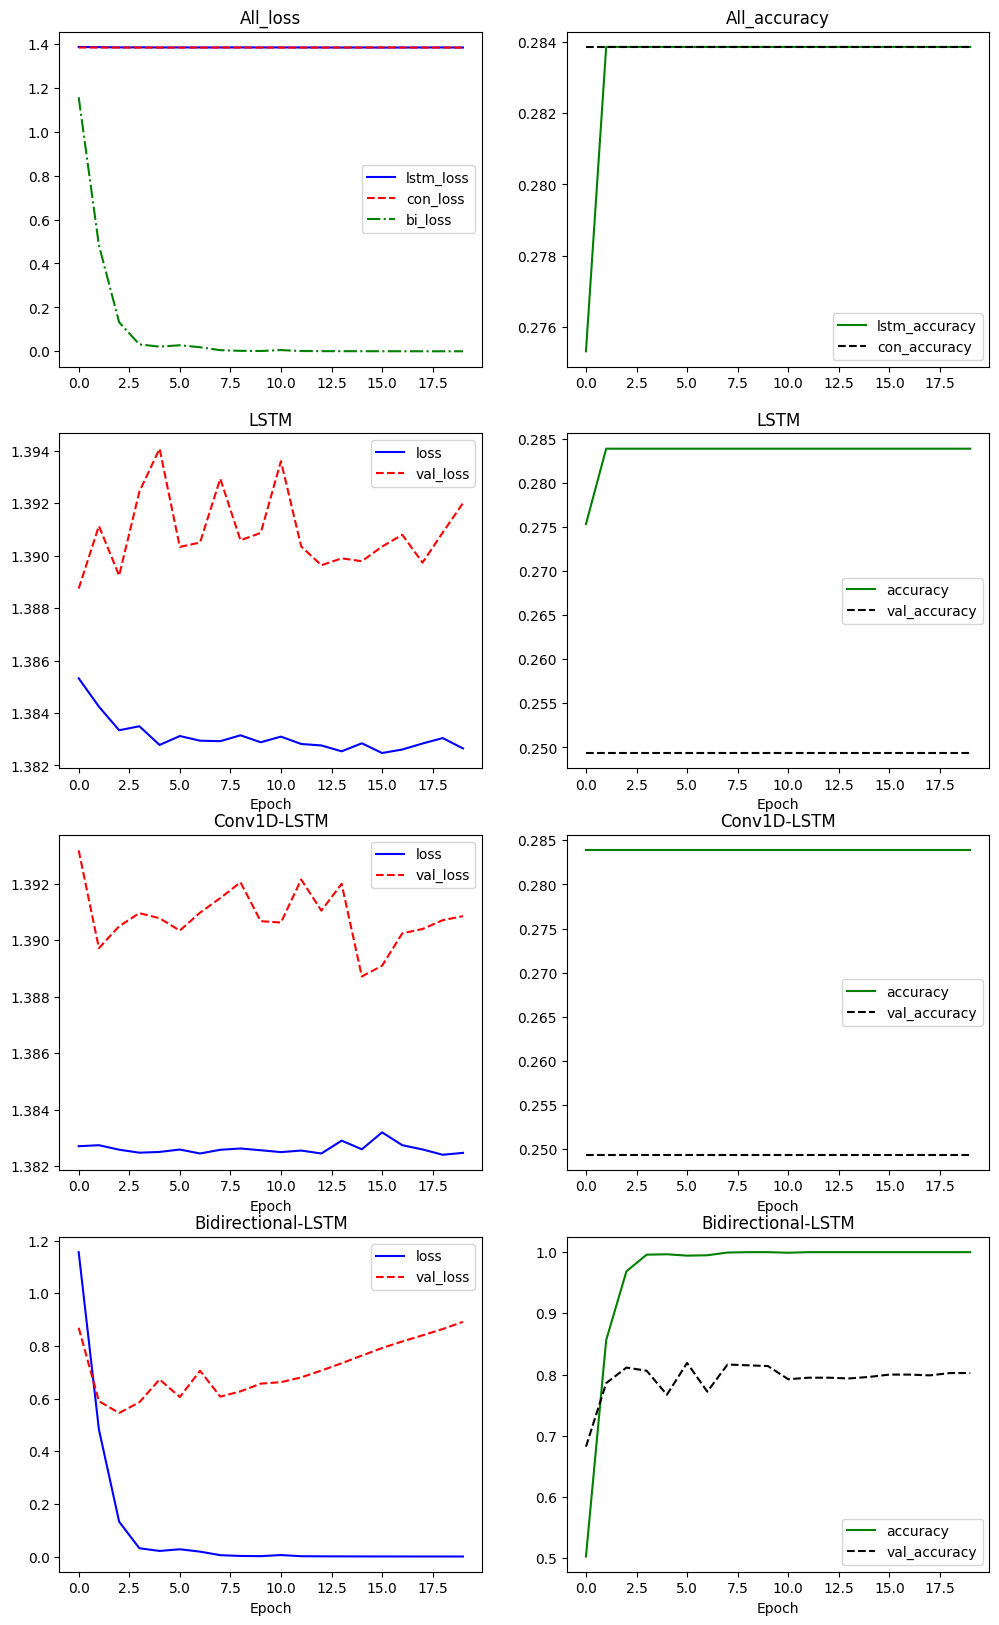

In [32]:
import matplotlib.pyplot as plt
# 학습 결과 시각화

num_model = 4
plt_size = num_model + 1

plt.figure(figsize=(12, 5 * plt_size))

plt.subplot(plt_size, 2, 1)
plt.plot(history.history['loss'], 'b-', label='lstm_loss')
plt.plot(con_history.history['loss'], 'r--', label='con_loss')
plt.plot(model_bi_history.history['loss'], 'g-.', label='bi_loss')
plt.plot(history_bert.history['loss'], 'k:', label='bert_loss')
plt.plot()
plt.title('All_loss')
plt.legend()

plt.subplot(plt_size, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='lstm_accuracy')
plt.plot(con_history.history['accuracy'], 'k--', label='con_accuracy')
plt.title('All_accuracy')
plt.legend()

plt.subplot(plt_size, 2, 3)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.title('LSTM')
plt.legend()

plt.subplot(plt_size, 2, 4)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.title('LSTM')
plt.legend()

plt.subplot(plt_size, 2, 5)
plt.plot(con_history.history['loss'], 'b-', label='loss')
plt.plot(con_history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.title('Conv1D-LSTM')
plt.legend()

plt.subplot(plt_size, 2, 6)
plt.plot(con_history.history['accuracy'], 'g-', label='accuracy')
plt.plot(con_history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.title('Conv1D-LSTM')
plt.legend()

plt.subplot(plt_size, 2, 7)
plt.plot(model_bi_history.history['loss'], 'b-', label='loss')
plt.plot(model_bi_history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.title('Bidirectional-LSTM')
plt.legend()

plt.subplot(plt_size, 2, 8)
plt.plot(model_bi_history.history['accuracy'], 'g-', label='accuracy')
plt.plot(model_bi_history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.title('Bidirectional-LSTM')
plt.legend()

plt.subplot(plt_size, 2, 9)
plt.plot(history_bert.history['loss'], 'b-', label='loss')
plt.plot(history_bert.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.title('BERT')
plt.legend()

plt.subplot(plt_size, 2, 10)
plt.plot(history_bert.history['accuracy'], 'g-', label='accuracy')
plt.plot(history_bert.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.title('BERT')
plt.legend()

plt.show()